In [1]:
# SECENGUP
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import re
from io import StringIO

In [2]:
def plot_single_file(filename):
    data = pd.read_csv(filename)[0:2000]
    print(len(data))
    plt.scatter(data['time'], data['input'], s=1, label=filename)
    plt.scatter(data['time'], data['output'], s=1, label=filename)

In [3]:
tree = ET.parse('data/meta.xml')
tests = tree.getroot()

def parse_test(test):
    dic = {}
    for child in test:
        dic[child.tag] = child.text
    return dic

def is_tip_line(line):
    return line[0:4] == 'time'


def split_file(file):
    lines = open(file, 'r').readlines()
    str_cycles = []
    current_cycle = ""
    for line in lines:
        if (is_tip_line(line)):
            str_cycles.append(current_cycle)
            current_cycle = line
        else:
            current_cycle += line
    str_cycles.append(current_cycle)
    str_cycles = str_cycles[1:]
    cycles = []
    for str_cycle in str_cycles:
        csv = pd.read_csv(StringIO(str_cycle))
        cycles.append([list(csv['input']), list(csv['output'])])
    return cycles
        

# for test in tests:
#     dic = parse_test(test)
#     file = dic['file']
# #     plot_single_file(file)
#     split_file(file)
# cycles = split_file("data/2_13_100_12")
# cycle0 = cycles[0]
# plt.scatter(cycle0[0], cycle0[1], s=1, label="fwe")
# plt.scatter(data['time'], data['output'], s=1, label=filename)
# cycle = StringIO(str_cycles[0])
# list(pd.read_csv(cycle)['input'])

In [4]:
def plot_file(filename):
    data = pd.read_csv(filename) # input
    plt.title(filename)
    plt.scatter(data['input'], data['output'], s=1, label=filename)


In [130]:
import math

def get_zero_points(filename):
    data = pd.read_csv(filename)
    input_data = data['input']
    is_positive = input_data[0] > 0
    zero_points = []
    for i in range(len(data)):
        new_is_positive = input_data[i] > 0
        if (is_positive != new_is_positive):
            # met a zero points
            zero_points.append(i)
            is_positive = new_is_positive
    return zero_points

# test_file = "data/2_1_100_12_1632217099"
# test_zero_points = get_zero_points(test_file)
# print(test_zero_points, len(test_zero_points))

In [126]:
def plot_cycle(cycle):
    time_list = list(cycle['time'])
    input_list = list(cycle['input'])
    output_list = list(cycle['output'])
    
    plt.figure()
    plt.plot(time_list, input_list, label="input")
    plt.plot(time_list, output_list, label="output")

def split_cycles(filename):
    data = pd.read_csv(filename)
    zero_points = get_zero_points(filename)
    zero_points_len = len(zero_points)
    cycles = []
    for i in range(0, zero_points_len, 2):
        start = zero_points[i]
        if (i + 2 < zero_points_len):
            end = zero_points[i+2]
        else:
            end = len(data)
        if (end - start < 80):
            raise Error('Split Cycles Error')
        frame = data[start : end]
#         if (i == 0):
#             print([list(frame['input']), list(frame['output'])])
        cycles.append([list(frame['input']), list(frame['output'])])
    return cycles

# cycles = split_cycles('/Users/lwh/Downloads/test_data/KNOWM_Memristors/Chip1/1000/1_7_1000_12_1631626903')
# print(len(cycles))
# print(cycles[100])
# print([list(cycles[0]['input']), list(cycles[0]['output'])])

In [127]:
# import os
# directory_str = '/Users/lwh/Downloads/test_data/'
# directory = os.fsencode(directory_str)

# a = 0
# for root, subdirs, files in os.walk(directory):
#     for file in files:
#         if (file == b'.DS_Store' or file == b'meta.xml'):
#             continue
#         filepath = os.path.join(root, file).decode('utf-8')
#         cycles = split_cycles(filepath)
#         print(len(cycles))

In [128]:
def plot_files(filenames, mix = False):
    for filename in filenames:
        if (not mix):
            plt.figure()
        plot_file(filename)
        plt.legend()

In [129]:
def get_real_value(key, test):
    text_value = test.find(key).text
    if (key == 'voltage'):
        return float(text_value)
    elif (key == 'file'):
        return text_value
    else:
        return int(text_value)

def is_valid(dic, test):
    v = False
    if (test.find('frequency').text == '200' and float(test.find('voltage').text) == 0.5):
        v = True
    for key in dic.keys():
        real_value = get_real_value(key, test)
        if (key == 'file'):
            if (not re.search(dic[key], real_value)):
                return False
        elif (real_value != dic[key]):
            return False
    return True
    
def filter(dic):
    keys = list(dic.keys())
    filenames = []
    for test in root.findall('test'):
        if (is_valid(dic, test)):
            filenames.append(test.find('file').text)
    return filenames

# filenames = filter({"frequency": 500, "voltage": 0.8})

In [185]:
from random import randint

labels = []
train_data = []

cells = 16
data_len = 950

def parse_test(test):
    dic = {}
    for child in test:
        dic[child.tag] = child.text
    return dic

def get_label(cell_number):
    label = [0] * cells
    label[cell_number - 1] = 1
    return label

def trim_cycle(cycle):
    while (len(cycle[0]) > data_len):
        pos = randint(0, len(cycle[0]) - 1)
        cycle[0].pop(pos)
        cycle[1].pop(pos)

t_voltage = 1.2
t_frequency = 100
cycles_num = 30

tree = ET.parse('data/meta.xml')
tests = tree.getroot()

for test in tests:
    dic = parse_test(test)
    cell_number = int(dic['cell'])
    file = dic['file']
    voltage = float(dic['voltage'])
    frequency = int(dic['frequency'])
#     cycles = split_cycles(file)
    cycles = split_file(file)
    
# #     if (len(cycles) == 0):
# #         # measurement errors;
# #         # nomarlly no more than 10 cycles in a test file;
# #         # drop these error files
# #         continue
#     if (cell_number > cells):
#         continue
    if (voltage != t_voltage or frequency != t_frequency):
        continue
    for cycle in cycles:
        trim_cycle(cycle)
        labels.append(get_label(cell_number))
        train_data.append(cycle)

print(len(train_data))

3680


In [189]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# print(len(train_data))
# print(tf.shape(train_data[0]))
# print(train_data[5000])
print(tf.shape(train_data))
input_shape = (2, 950)

model = models.Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(500,activation='relu'))
model.add(Dense(cells, activation='softmax'))
model.build(input_shape)
model.summary()

# Split data into test and training set
X_train, X_test, y_train, y_test = train_test_split(np.array(train_data), np.array(labels), test_size=0.3, shuffle=True)

# Set loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start training
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=5, shuffle=True)


# Evaluate using the test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_loss, test_acc)

tf.Tensor([3680    2  950], shape=(3,), dtype=int32)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 1900)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 500)               950500    
_________________________________________________________________
dense_65 (Dense)             (None, 16)                8016      
Total params: 958,516
Trainable params: 958,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
412/412 [==============================] - 1s 3ms/step - loss: 4.1071 - accuracy: 0.2189 - val_loss: 3.3884 - val_accuracy: 0.2868
Epoch 2/20
412/412 [==============================] - 1s 3ms/step - loss: 2.4171 - accuracy: 0.3393 - val_loss: 2.0444 - val_accuracy: 0.3547
Epoch 3/20
412/412 [====================

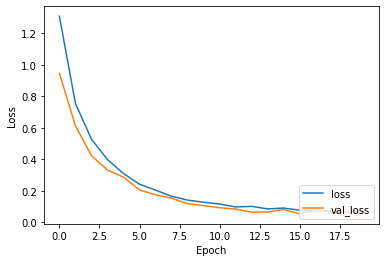

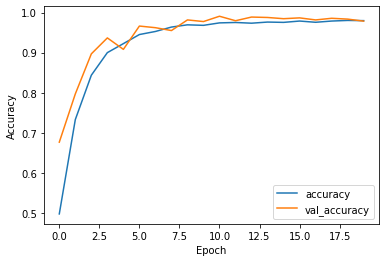

In [10]:

fig_loss, ax_loss = plt.subplots()
ax_loss.plot(history.history['loss'], label='loss')
ax_loss.plot(history.history['val_loss'], label='val_loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.legend(loc='lower right')

fig, ax = plt.subplots()

ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')

In [ ]:
predictions = model.predict(X_test)
for i in range(len(prediction)):